In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_path1='house.png'
house_pic =tf.keras.utils.load_img(img_path1,target_size=(224,224),color_mode='grayscale')
image_array =tf.keras.utils.img_to_array(house_pic)

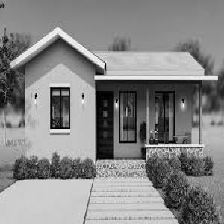

In [4]:
house_pic

In [6]:
image_array.shape

(224, 224, 1)

In [7]:
image_batch=np.expand_dims(image_array,axis=0)
print(f"image batch shape :{image_batch.shape}")

image batch shape :(1, 224, 224, 1)


In [9]:
# convolution layer
smart_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=1,kernel_size=(5,5),input_shape=(224,224,1))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
vertical_ege_filter =np.array([
    [[-2],[-1],[0],[1],[2]],
    [[-2],[-1],[0],[1],[2]],
    [[-2],[-1],[0],[1],[2]],
    [[-2],[-1],[0],[1],[2]],
    [[-2],[-1],[0],[1],[2]]
])

In [12]:
vertical=vertical_ege_filter.reshape(5,5,1,1)

In [13]:
smart_model.layers[0].set_weights([vertical,np.array([0.0])])

In [14]:
feature_map =smart_model.predict(image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


In [15]:
pooled_model =tf.keras.models.Sequential([
    tf.keras.layers.MaxPool2D(pool_size=(4,4))
])

In [16]:
pooled_map =pooled_model.predict(feature_map)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


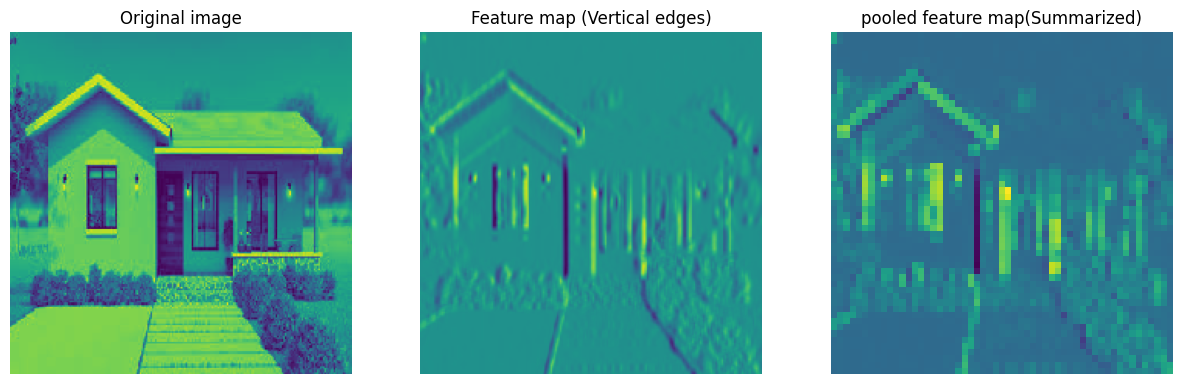

In [20]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.imshow(image_array)
plt.title("Original image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(feature_map[0,:,:,0])
plt.title("Feature map (Vertical edges)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pooled_map[0,:,:,0])
plt.title("pooled feature map(Summarized)")
plt.axis("off")

plt.show()